In [1]:
"""Assignment 4: Uniform Cost Search for Optimal Path

Objective: Implement Uniform Cost Search for a weighted graph.

Problem Statement: Given a weighted graph (e.g., a transportation network with travel costs), find the minimum-cost path between two nodes.

Tasks:

⚫ Represent the graph as an adjacency list.

⚫ Implement Uniform Cost Search to find the optimal path.

⚫ Compare it with BFS for unweighted graphs."""

'Assignment 4: Uniform Cost Search for Optimal Path\n\nObjective: Implement Uniform Cost Search for a weighted graph.\n\nProblem Statement: Given a weighted graph (e.g., a transportation network with travel costs), find the minimum-cost path between two nodes.\n\nTasks:\n\n⚫ Represent the graph as an adjacency list.\n\n⚫ Implement Uniform Cost Search to find the optimal path.\n\n⚫ Compare it with BFS for unweighted graphs.'

Uniform Cost Search: Cost = 4, Path = ['A', 'B', 'C', 'D']
Breadth-First Search: Path = ['A', 'B', 'D']


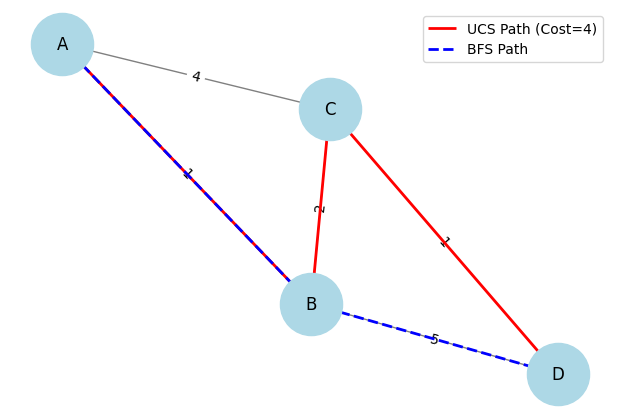

In [2]:
import heapq
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start, [])]  # (cost, node, path)
    visited = set()
    
    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)
        
        if node in visited:
            continue
        
        path = path + [node]
        visited.add(node)
        
        if node == goal:
            return cost, path  # Return the minimum cost and path
        
        for neighbor, weight in graph.get(node, []):
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + weight, neighbor, path))
    
    return float('inf'), []  # No path found

def bfs(graph, start, goal):
    queue = deque([(start, [start])])
    visited = set()
    
    while queue:
        node, path = queue.popleft()
        
        if node in visited:
            continue
        
        visited.add(node)
        
        if node == goal:
            return path  # Return the path found
        
        for neighbor, _ in graph.get(node, []):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
    
    return []  # No path found

def visualize_graph(graph, ucs_path, ucs_cost, bfs_path):
    G = nx.Graph()
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    if ucs_path:
        ucs_edges = [(ucs_path[i], ucs_path[i+1]) for i in range(len(ucs_path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=ucs_edges, edge_color='red', width=2, label=f'UCS Path (Cost={ucs_cost})')
    
    if bfs_path:
        bfs_edges = [(bfs_path[i], bfs_path[i+1]) for i in range(len(bfs_path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='blue', width=2, style='dashed', label='BFS Path')
    
    plt.legend()
    plt.show()

# Example weighted graph as adjacency list
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}

start, goal = 'A', 'D'
ucs_cost, ucs_path = uniform_cost_search(graph, start, goal)
bfs_path = bfs(graph, start, goal)

print(f"Uniform Cost Search: Cost = {ucs_cost}, Path = {ucs_path}")
print(f"Breadth-First Search: Path = {bfs_path}")

visualize_graph(graph, ucs_path, ucs_cost, bfs_path)
